In [53]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 

In [54]:
import warnings
warnings.filterwarnings('ignore')

# Read the dataset

In [55]:
df1 = pd.read_excel('Cafe_Data_MRA.xlsx')

In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145830 entries, 0 to 145829
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          145830 non-null  datetime64[ns]
 1   Bill Number   145830 non-null  object        
 2   Item Desc     145830 non-null  object        
 3   Time          145830 non-null  object        
 4   Quantity      145830 non-null  int64         
 5   Rate          145830 non-null  float64       
 6   Tax           145830 non-null  float64       
 7   Discount      145830 non-null  float64       
 8   Total         145830 non-null  float64       
 9   Category      145830 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 11.1+ MB


# EDA

In [56]:
df1.head()

,Date,Bill Number,Item Desc,Time,Quantity,Rate,Tax,Discount,Total,Category
0,2010-04-01,G0470115,QUA MINERAL WATER(1000ML),13:15:11,1,50.0,11.88,0.0,61.88,BEVERAGE
1,2010-04-01,G0470115,MONSOON MALABAR (AULAIT),13:15:11,1,100.0,23.75,0.0,123.75,BEVERAGE
2,2010-04-01,G0470116,MASALA CHAI CUTTING,13:17:35,1,40.0,9.50,0.0,49.50,BEVERAGE
3,2010-04-01,G0470117,QUA MINERAL WATER(1000ML),13:19:55,1,50.0,11.88,0.0,61.88,BEVERAGE
4,2010-04-01,G0470283,MOROCCAN MINT TEA,01:20:18,1,45.0,10.69,0.0,55.69,BEVERAGE


df1.info()

print("no. of rows: ",df1.shape[0], "\n""no. of columns: ",df1.shape[1])

df1.isnull().sum()

# Univariate Analysis - Numeric Features

Text(0.5, 1.0, 'Total Distribution')

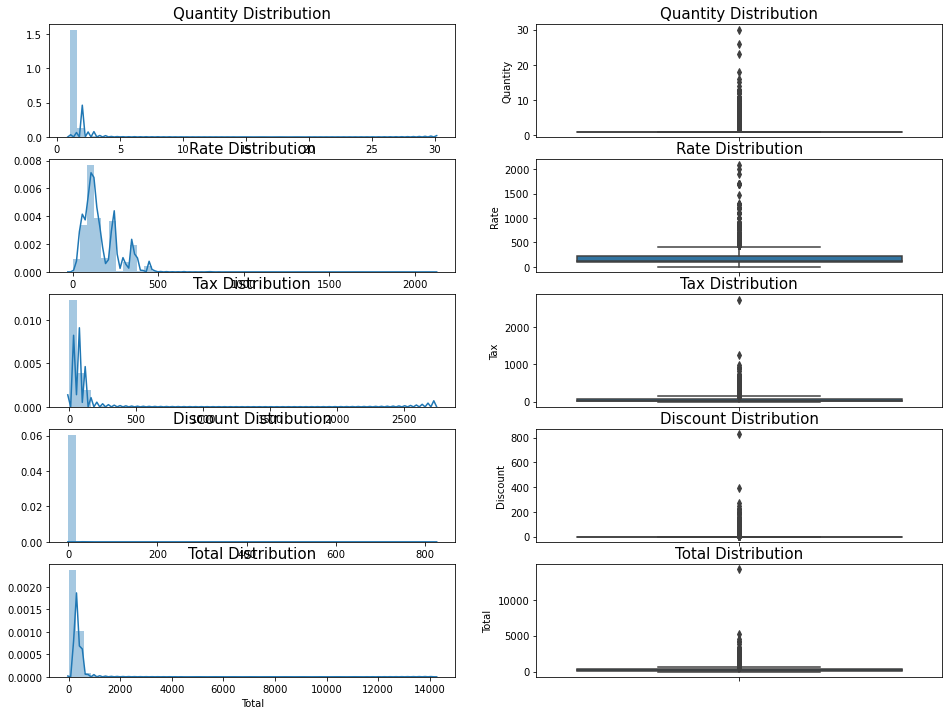

In [60]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(16, 12)
a = sns.distplot(df1['Quantity'] , ax=axes[0][0])
a.set_title("Quantity Distribution",fontsize=15)
a = sns.boxplot(df1['Quantity'] , orient = "v" , ax=axes[0][1])
a.set_title("Quantity Distribution",fontsize=15)

a = sns.distplot(df1['Rate'] , ax=axes[1][0])
a.set_title("Rate Distribution",fontsize=15)
a = sns.boxplot(df1['Rate'] , orient = "v" , ax=axes[1][1])
a.set_title("Rate Distribution",fontsize=15)

a = sns.distplot(df1['Tax'] , ax=axes[2][0])
a.set_title("Tax Distribution",fontsize=15)
a = sns.boxplot(df1['Tax'] , orient = "v" , ax=axes[2][1])
a.set_title("Tax Distribution",fontsize=15)

a = sns.distplot(df1['Discount'] , ax=axes[3][0])
a.set_title("Discount Distribution",fontsize=15)
a = sns.boxplot(df1['Discount'] , orient = "v" , ax=axes[3][1])
a.set_title("Discount Distribution",fontsize=15)

a = sns.distplot(df1['Total'] , ax=axes[4][0])
a.set_title("Total Distribution",fontsize=15)
a = sns.boxplot(df1['Total'] , orient = "v" , ax=axes[4][1])
a.set_title("Total Distribution",fontsize=15)


In [ ]:
#Univariate analysis with categorical features

In [101]:
cat=[]
num=[]
for i in df1.columns:
    if df1[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Bill Number ', 'Item Desc', 'Time', 'Category']
['Date', 'Quantity', 'Rate', 'Tax', 'Discount', 'Total']


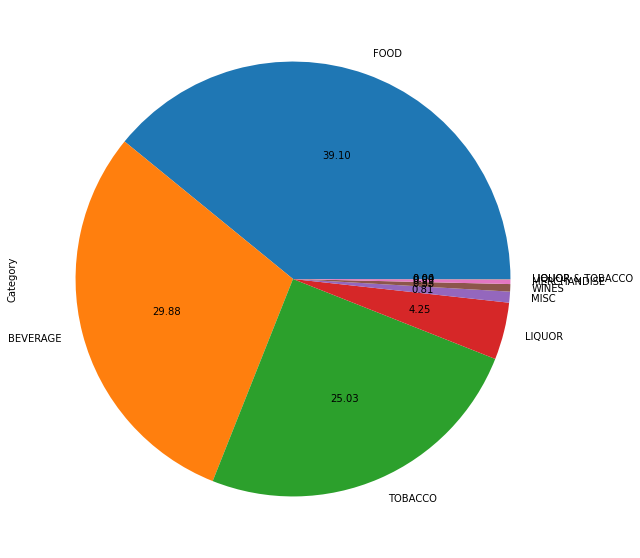

In [109]:
df1['Category'].value_counts().plot.pie(figsize=(10, 10), autopct='%.2f')

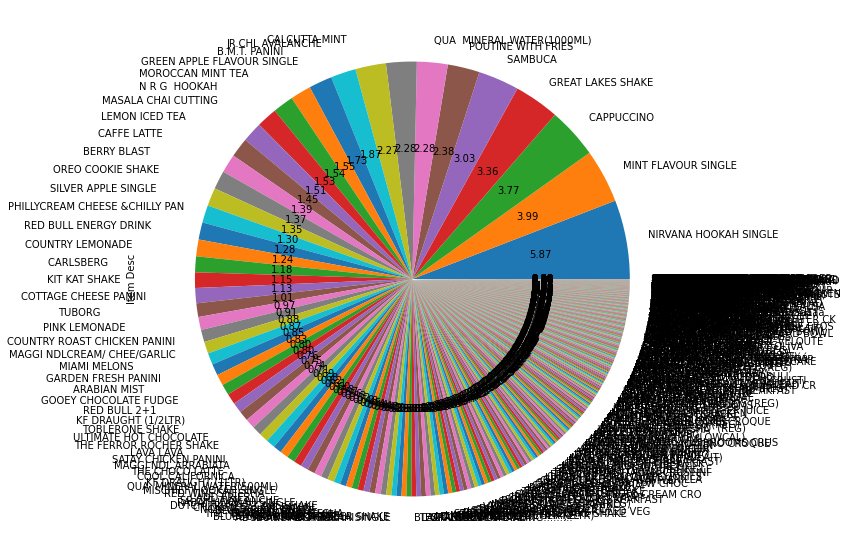

In [110]:
df1['Item Desc'].value_counts().plot.pie(figsize=(10, 10), autopct='%.2f')

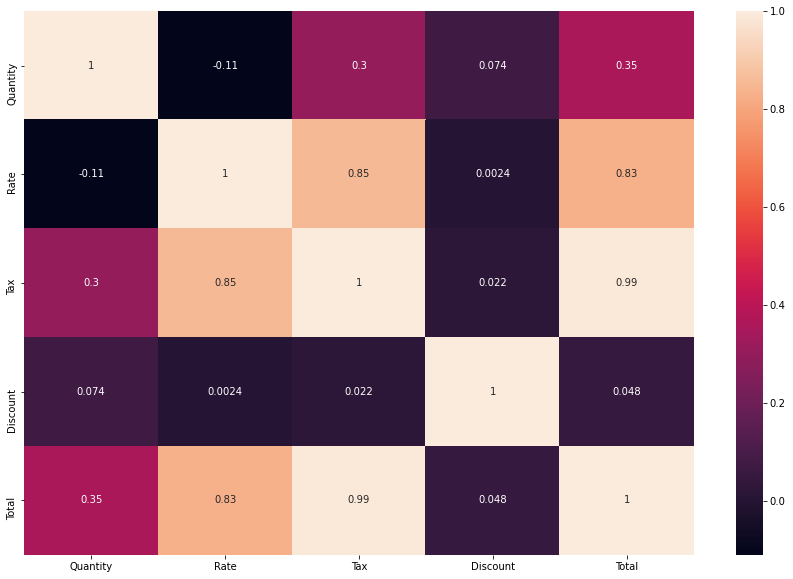

In [106]:
# Correlation matrix  
corr = df1[num].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.show()

#Below finding
# Rate,Tax and Total are highly correlated with each other


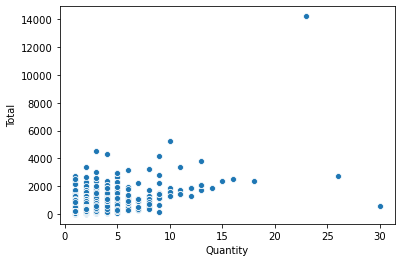

In [111]:
sns.scatterplot(x='Quantity', y= 'Total', data=df1)

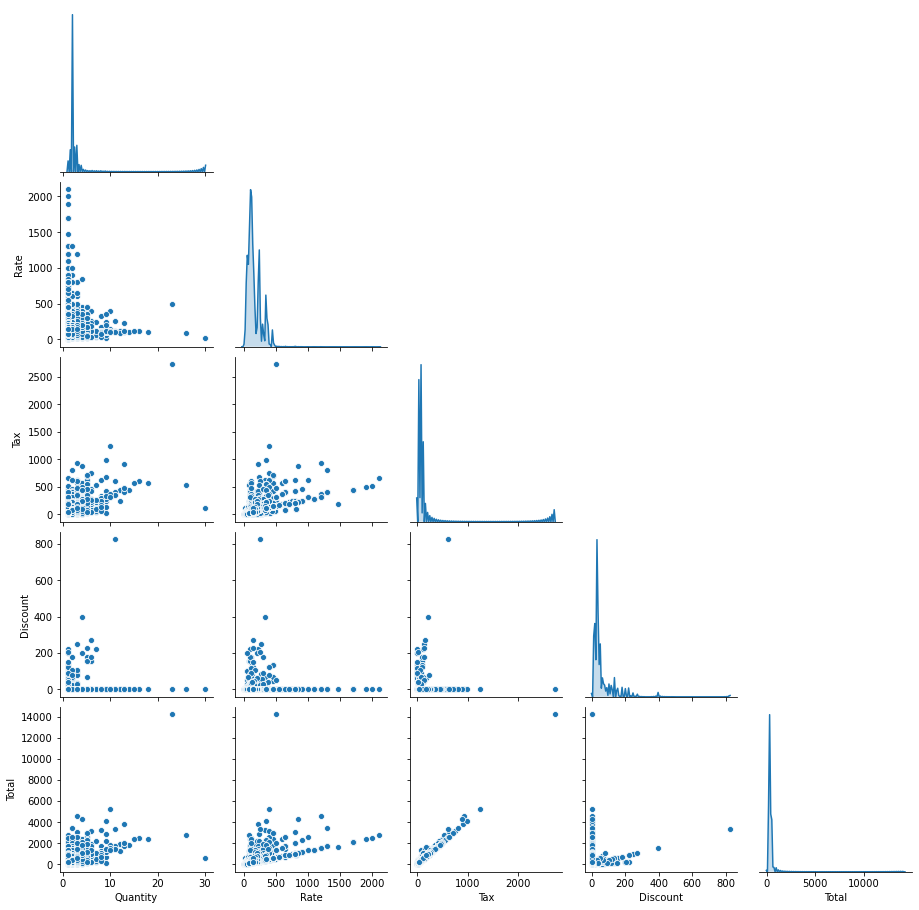

In [112]:
#Let us check for pair plots
sns.pairplot(df1,diag_kind='kde',corner=True)

In [ ]:
#It seems Total, Rate and Tax are highly correlated with each other. Hence there exists multicollinearity.